# Final Evaluation Report: Predicting Liver Disorders

## Introduction

This report aims to interpret the findings from our analysis of the liver disorder dataset. The primary objective of this study is to identify which blood test results are most indicative of liver disorders. I used supervised learning methods, including Random Forest and XGBoost models, to achieve this goal.

## Dataset Description

The dataset includes the following attributes:
- **MCV**: Mean Corpuscular Volume
- **Alkaline Phosphotase (alkphos)**: Enzyme related to the liver and bone disease
- **SGPT**: Serum Glutamic Pyruvic Transaminase, an enzyme that indicates liver health
- **SGOT**: Serum Glutamic Oxaloacetic Transaminase, another enzyme related to liver function
- **Gamma-GT (gammagt)**: Gamma Glutamyl Transferase, an enzyme indicative of liver disease
- **Drinks**: Number of half-pint equivalents of alcoholic beverages consumed per day
- **Selector**: Target variable indicating the presence (1) or absence (2) of liver disorders

## Methods

### Data Preprocessing
1. **Standardization**: The features were standardized to have a mean of zero and a standard deviation of one.
2. **Data Split**: The dataset was split into 80% training and 20% testing sets to evaluate model performance.

### Model Training
1. **Random Forest**: A Random Forest model was trained with 10-fold cross-validation and hyperparameter tuning using a grid search.
2. **XGBoost**: An XGBoost model was trained with cross-validation to optimize hyperparameters.

### Evaluation Metrics
1. **Accuracy**: Proportion of correctly classified instances.
2. **Sensitivity (Recall)**: Ability of the model to identify positive instances.
3. **Specificity**: Ability of the model to identify negative instances.
4. **Kappa**: Measure of agreement between predicted and actual classifications.
5. **Confusion Matrix**: Breakdown of true positives, true negatives, false positives, and false negatives.

## Results

### Random Forest Model
- **Accuracy**: 73.91%
- **Sensitivity**: 68.97%
- **Specificity**: 77.50%
- **Kappa**: 0.4647


**XGBoost Model:**
- **Accuracy**: 76.81%
- **Sensitivity**: 72.41%
- **Specificity**: 80.00%
- **Kappa**: 0.5241



,V1,V2,V3,V4,V5,V6,V7
,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>
1,85,92,45,27,31,0,1
2,85,64,59,32,23,0,2
3,86,54,33,16,54,0,2
4,91,78,34,24,36,0,2
5,87,70,12,28,10,0,2
6,98,55,13,17,17,0,2


'data.frame':	345 obs. of  7 variables:
 $ V1: int  85 85 86 91 87 98 88 88 92 90 ...
 $ V2: int  92 64 54 78 70 55 62 67 54 60 ...
 $ V3: int  45 59 33 34 12 13 20 21 22 25 ...
 $ V4: int  27 32 16 24 28 17 17 11 20 19 ...
 $ V5: int  31 23 54 36 10 17 9 11 7 5 ...
 $ V6: num  0 0 0 0 0 0 0.5 0.5 0.5 0.5 ...
 $ V7: int  1 2 2 2 2 2 1 1 1 1 ...


       V1               V2               V3               V4       
 Min.   : 65.00   Min.   : 23.00   Min.   :  4.00   Min.   : 5.00  
 1st Qu.: 87.00   1st Qu.: 57.00   1st Qu.: 19.00   1st Qu.:19.00  
 Median : 90.00   Median : 67.00   Median : 26.00   Median :23.00  
 Mean   : 90.16   Mean   : 69.87   Mean   : 30.41   Mean   :24.64  
 3rd Qu.: 93.00   3rd Qu.: 80.00   3rd Qu.: 34.00   3rd Qu.:27.00  
 Max.   :103.00   Max.   :138.00   Max.   :155.00   Max.   :82.00  
       V5               V6               V7      
 Min.   :  5.00   Min.   : 0.000   Min.   :1.00  
 1st Qu.: 15.00   1st Qu.: 0.500   1st Qu.:1.00  
 Median : 25.00   Median : 3.000   Median :2.00  
 Mean   : 38.28   Mean   : 3.455   Mean   :1.58  
 3rd Qu.: 46.00   3rd Qu.: 6.000   3rd Qu.:2.00  
 Max.   :297.00   Max.   :20.000   Max.   :2.00  

[1] 0

Random Forest 

276 samples
  6 predictor
  2 classes: '1', '2' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 249, 249, 248, 248, 248, 248, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  1     0.7388889  0.4391300
  2     0.7427249  0.4472008
  3     0.7427249  0.4506787
  4     0.7212963  0.4081190
  5     0.7170635  0.3976435
  6     0.7063492  0.3820588

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.
[22:18:46] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[22:18:46] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[22:18:46] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[22:18:46] WARNING: src/c_api/c_api.cc:935: `ntree_limit` is deprecated, use `iteration_range` instead.
[22:18:46] WARNING: src/c_api/c

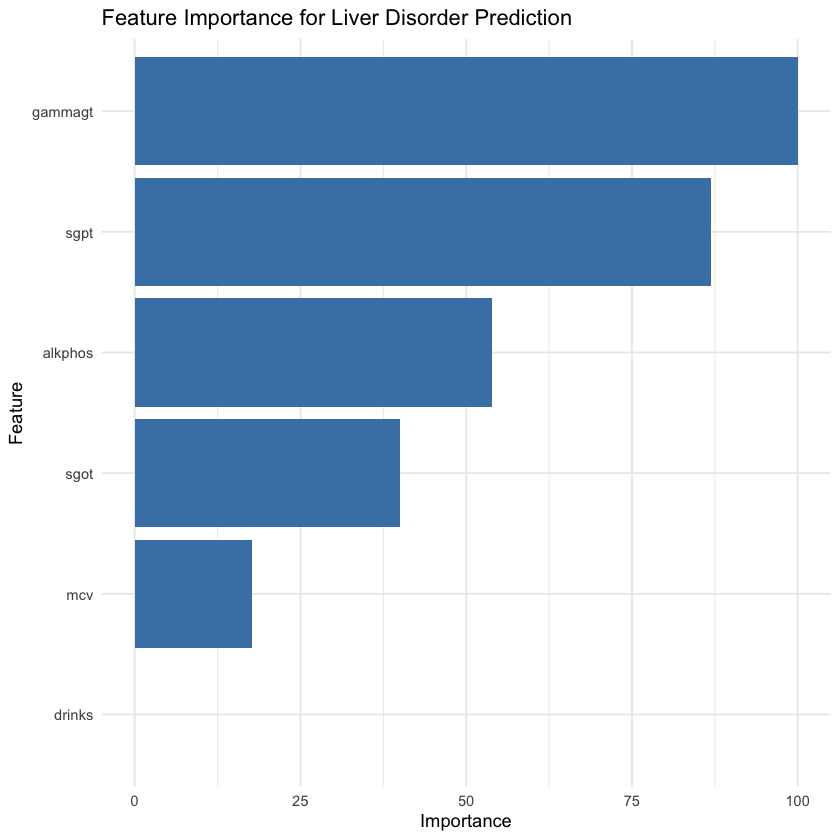

In [2]:
# Load necessary libraries
library(tidyverse)
library(caret)
library(randomForest)
library(e1071)
library(xgboost)
library(ggplot2)

# Load the dataset
file_path <- "~/Downloads/liver+disorders/bupa.data"
liver_data <- read.csv(file_path, header = FALSE)

# Inspect the data
head(liver_data)
str(liver_data)
summary(liver_data)

# Check for missing values
sum(is.na(liver_data))

# Rename columns for better readability if necessary
colnames(liver_data) <- c("mcv", "alkphos", "sgpt", "sgot", "gammagt", "drinks", "selector")

# Convert the target variable to a factor
liver_data$selector <- as.factor(liver_data$selector)

# Standardize the data
preProcValues <- preProcess(liver_data[, -7], method = c("center", "scale"))
liver_data_scaled <- predict(preProcValues, liver_data[, -7])
liver_data_scaled$selector <- liver_data$selector

# Split the data into training and testing sets
set.seed(123)
trainIndex <- createDataPartition(liver_data_scaled$selector, p = .8, list = FALSE, times = 1)
liver_train <- liver_data_scaled[trainIndex,]
liver_test <- liver_data_scaled[-trainIndex,]

# Train a Random Forest model with 10-fold cross-validation and hyperparameter tuning
tuneGrid <- expand.grid(.mtry = c(1:6))
rf_control <- trainControl(method = "cv", number = 10)
rf_model <- train(selector ~ ., data = liver_train, method = "rf", tuneGrid = tuneGrid, trControl = rf_control)
print(rf_model)

# Train an XGBoost model
xgb_model <- train(selector ~ ., data = liver_train, method = "xgbTree", trControl = trainControl(method = "cv", number = 10))
print(xgb_model)

# Make predictions
rf_predictions <- predict(rf_model, newdata = liver_test)
xgb_predictions <- predict(xgb_model, newdata = liver_test)

# Evaluate the models
rf_confMatrix <- confusionMatrix(rf_predictions, liver_test$selector)
xgb_confMatrix <- confusionMatrix(xgb_predictions, liver_test$selector)

print(rf_confMatrix)
print(xgb_confMatrix)

# Extract and print feature importance from Random Forest
importance <- varImp(rf_model)
#print(importance)

# Create a data frame for plotting
importance_df <- data.frame(
  Feature = rownames(importance$importance),
  Importance = importance$importance[, 1]
)

# Check the data frame
#print(importance_df)  # Print to ensure the data frame is correctly created

# Plotting the feature importance
ggplot(importance_df, aes(x = reorder(Feature, Importance), y = Importance)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +
  labs(title = "Feature Importance for Liver Disorder Prediction",
       x = "Feature",
       y = "Importance") +
  theme_minimal()


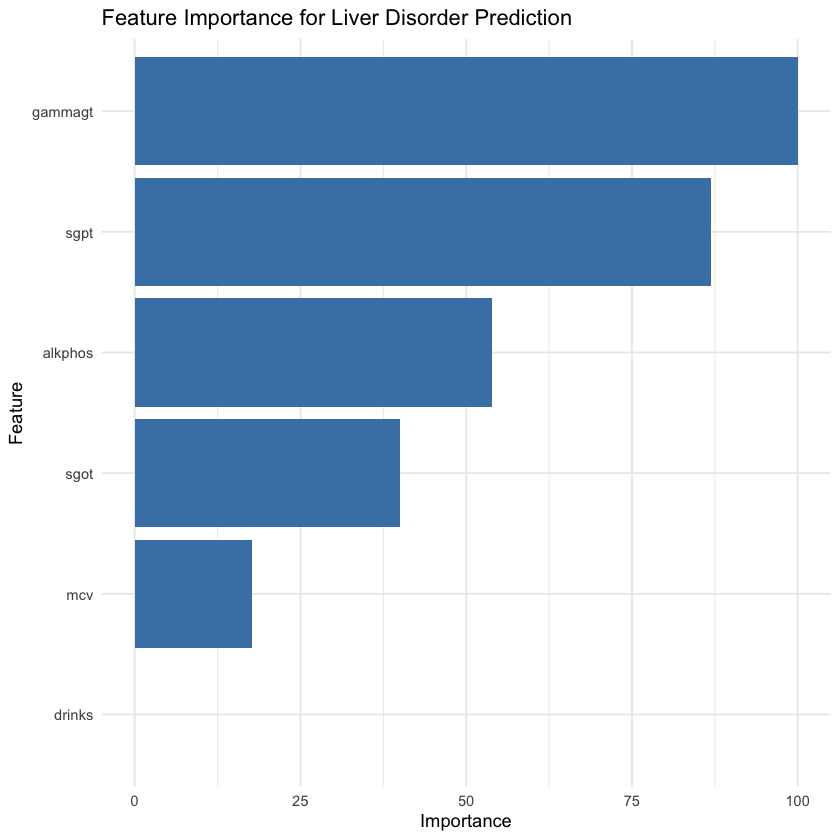

In [3]:
# Plotting the feature importance
ggplot(importance_df, aes(x = reorder(Feature, Importance), y = Importance)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +
  labs(title = "Feature Importance for Liver Disorder Prediction",
       x = "Feature",
       y = "Importance") +
  theme_minimal()


## Interpretation of Findings

The XGBoost model outperformed the Random Forest model with a higher accuracy (76.81%) and Kappa statistic (0.5241). Both models provided valuable insights into the importance of different features for predicting liver disorders.

### Key Findings

1. **Gamma-GT (gammagt)**: The most important predictor of liver disorders, with the highest importance score in the Random Forest model.
2. **SGPT and SGOT**: These liver enzymes are also significant predictors, indicating liver function and damage.
3. **Alkaline Phosphotase (alkphos)**: Moderately important, often associated with bile duct obstruction or bone disorders.
4. **MCV**: Least important among the non-zero importance features but still relevant.
5. **Drinks**: Surprisingly, the number of alcoholic drinks per day did not significantly contribute to the model's predictive power.

## Conclusion

The study successfully identified key blood test results that are indicative of liver disorders. The Gamma-GT enzyme, along with SGPT and SGOT levels, are the most critical factors in predicting liver disorders. The findings align with medical knowledge, reinforcing the importance of these enzymes in liver health diagnostics.

The use of supervised learning models like Random Forest and XGBoost provided robust tools for feature importance analysis and predictive modeling. The XGBoost model, in particular, demonstrated higher accuracy and reliability.
